In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
covid = pd.read_csv('../data/2018_5yr.csv')
census = pd.read_csv('../data/nyt_county.csv')
hosps_county = pd.read_csv('../data/us_healthcare_capacity-county-CovidCareMap.csv')
hosps_facility = pd.read_csv('../data/us_healthcare_capacity-facility-CovidCareMap.csv')

In [41]:
test = pd.read_csv('../data/2018_5yr.csv')
test.shape

(3220, 242)

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381436 entries, 0 to 1381435
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date              1381436 non-null  object 
 1   county            1381436 non-null  object 
 2   state_name        1381436 non-null  object 
 3   county_fips_code  1368825 non-null  float64
 4   confirmed_cases   1381436 non-null  int64  
 5   deaths            1350741 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 63.2+ MB


In [36]:
covid.groupby(by=['county_fips_code'])[['confirmed_cases', 'deaths']].max().reset_index()

,county_fips_code,confirmed_cases,deaths
0,1001.0,7161,111.0
1,1003.0,21674,311.0
2,1005.0,2340,59.0
3,1007.0,2666,64.0
4,1009.0,6889,139.0
...,...,...,...
3213,72151.0,1392,NaN
3214,72153.0,1255,NaN
3215,78010.0,1398,10.0
3216,78020.0,242,1.0


In [4]:
covid.groupby(['county', 'state_name']).mean().head()

,,county_fips_code,confirmed_cases,deaths
county,state_name,,,
Abbeville,South Carolina,45001.0,1036.662132,17.755102
Acadia,Louisiana,22001.0,3491.577626,107.856164
Accomack,Virginia,51001.0,1520.586364,22.090909
Ada,Idaho,16001.0,23114.266219,216.921700
Adair,Iowa,19001.0,352.875847,11.214447


In [5]:
hospitals.shape

(24133, 9)

In [6]:
hospitals.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Plumas,2020-03-29,0.0,1.0,NaN,NaN,0.0,1.0,NaN
1,Solano,2020-03-29,7.0,27.0,NaN,NaN,4.0,1.0,28.0
2,Tulare,2020-03-29,6.0,13.0,NaN,NaN,5.0,3.0,7.0
3,Sonoma,2020-03-29,7.0,20.0,NaN,NaN,2.0,5.0,12.0
4,Mono,2020-03-29,0.0,1.0,NaN,NaN,0.0,0.0,2.0


In [7]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24133 entries, 0 to 24132
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   county                                 24133 non-null  object 
 1   todays_date                            24133 non-null  object 
 2   hospitalized_covid_confirmed_patients  24125 non-null  float64
 3   hospitalized_suspected_covid_patients  24125 non-null  float64
 4   hospitalized_covid_patients            22848 non-null  float64
 5   all_hospital_beds                      22758 non-null  float64
 6   icu_covid_confirmed_patients           24104 non-null  float64
 7   icu_suspected_covid_patients           24104 non-null  float64
 8   icu_available_beds                     23329 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.7+ MB


In [8]:
hospitals['todays_date'].nunique()

431

In [9]:
hospitals['todays_date'].max()

'2021-06-02'

In [10]:
hospitals.duplicated(subset=['county', 'todays_date'], keep='first').sum()

0

In [11]:
hospitals.set_index('todays_date', inplace=True)

In [12]:
hospitals.groupby(by='county').count().shape

(56, 7)

<AxesSubplot:xlabel='todays_date'>

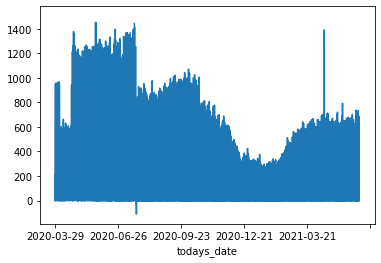

In [13]:
hospitals.sort_index(inplace=True)
hospitals['icu_available_beds'].plot()

In [14]:
temp_hospital = hospitals
temp_hospital['icu_available_beds'] = temp_hospital['icu_available_beds'].pct_change()
temp_hospital.dropna(inplace=True)

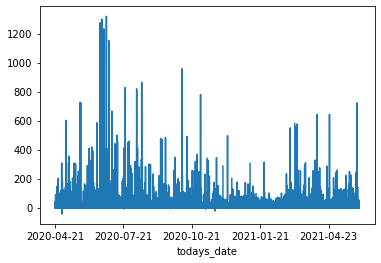

In [15]:
temp_hospital['icu_available_beds'].plot();

<Figure size 720x720 with 0 Axes>

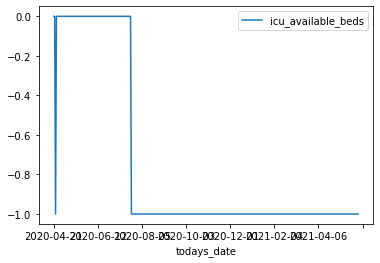

In [16]:
plt.figure(figsize=(10, 10))
temp_hospital[temp_hospital['county'] == 'Plumas'][['icu_available_beds']].plot();

In [17]:
covid.shape, census.shape

((1381436, 6), (3220, 242))

In [18]:
covid['state_name']

0            Rhode Island
1            Rhode Island
2            Rhode Island
3                 Vermont
4                 Arizona
                ...      
1381431          Missouri
1381432          Missouri
1381433          Missouri
1381434         Louisiana
1381435    North Carolina
Name: state_name, Length: 1381436, dtype: object

In [19]:
covid[covid['state_name'] == 'California'].shape[0]

25675

In [20]:
covid[covid['state_name'] == 'California'].isna().sum() / covid[covid['state_name'] == 'California'].shape[0]

date                0.000000
county              0.000000
state_name          0.000000
county_fips_code    0.000351
confirmed_cases     0.000000
deaths              0.000000
dtype: float64

In [21]:
census.shape

(3220, 242)

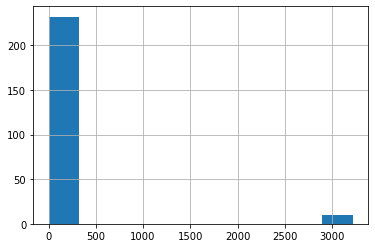

In [22]:
census.isna().sum().hist();

In [23]:
census.columns

Index(['geo_id', 'do_date', 'total_pop', 'households', 'male_pop',
       'female_pop', 'median_age', 'male_under_5', 'male_5_to_9',
       'male_10_to_14',
       ...
       'management_business_sci_arts_employed', 'sales_office_employed',
       'in_grades_1_to_4', 'in_grades_5_to_8', 'in_grades_9_to_12',
       'in_school', 'in_undergrad_college', 'speak_only_english_at_home',
       'speak_spanish_at_home', 'speak_spanish_at_home_low_english'],
      dtype='object', length=242)

In [24]:
census.columns[(census.isna().sum() / census.shape[0]) == 1]

Index(['pop_5_years_over', 'pop_15_and_over', 'pop_never_married',
       'pop_now_married', 'pop_separated', 'pop_widowed', 'pop_divorced',
       'speak_only_english_at_home', 'speak_spanish_at_home',
       'speak_spanish_at_home_low_english'],
      dtype='object')

In [25]:
census.head()

,geo_id,do_date,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,...,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english
0,35039,2014-01-01,39307.0,12398.0,19250.0,20057.0,40.6,1224.0,1240.0,1278.0,...,NaN,NaN,2170.0,1985.0,1970.0,9260.0,1653.0,NaN,NaN,NaN
1,72133,2014-01-01,22066.0,7465.0,10650.0,11416.0,37.8,567.0,662.0,864.0,...,2171.0,1242.0,1155.0,1362.0,1319.0,5884.0,1410.0,NaN,NaN,NaN
2,72043,2014-01-01,39265.0,13346.0,19056.0,20209.0,40.7,945.0,1109.0,1431.0,...,3023.0,2529.0,1851.0,2144.0,1901.0,9475.0,2219.0,NaN,NaN,NaN
3,72151,2014-01-01,34149.0,11722.0,16541.0,17608.0,42.5,754.0,1095.0,1020.0,...,1969.0,1700.0,1957.0,1388.0,1933.0,8055.0,2147.0,NaN,NaN,NaN
4,72071,2014-01-01,42420.0,15012.0,20629.0,21791.0,41.6,898.0,1159.0,1381.0,...,3246.0,2725.0,1996.0,2057.0,2211.0,10099.0,2551.0,NaN,NaN,NaN


In [26]:
census.groupby('geo_id').count().shape

(3220, 241)

In [27]:
# census overimpose w/ county and icu beds
# show death rates based on poverty

# new york govenor was hiding actual covid death rate in nursing homes
# could look for indicators of cover up in california

## Model